In [2]:
from sklearn.datasets import load_digits
import numpy as np


digits = load_digits()

<Figure size 640x480 with 0 Axes>

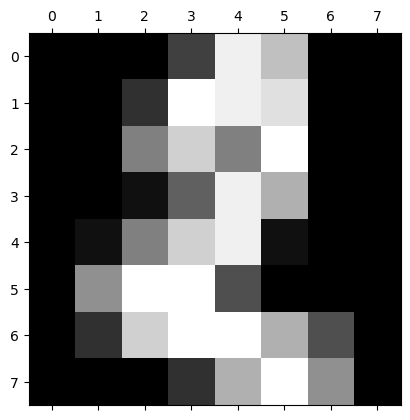

In [3]:
import matplotlib.pyplot as plt

plt.gray()
plt.matshow(digits['images'][2])
plt.show()

In [64]:
%reload_ext autoreload
%autoreload 2

import copy
from src.nuclei.anneal import Anneal
from src.nuclei.losses import CrossEntropy
from src.nuclei.optical import Saccade, OpticalNucleus


n_samples = 8
width = 2
saccade = Saccade(width, n_samples)

def abstract(image, saccade):
    saccade.observe(image)
    return copy.deepcopy(saccade)

def create_data(digits, saccade):
    return {
        'x': [abstract(image, saccade) for image in digits['images']],
        'y': [True if str(y).endswith('0') else False for y in digits['target']]
    }

stimuli = create_data(digits, saccade)
n = OpticalNucleus(digits['images'][0].shape[0], lr=0.5)


temp = 2
anneal = Anneal(n, temp, CrossEntropy(), steps=50, epochs=5)

Epoch: 1


training in epoch 1:  72%|███████▏  | 36/50 [00:09<00:03,  3.97it/s]/Users/luisandrade/git/nuclei/src/nuclei/activations.py:42: RuntimeWarning: overflow encountered in exp
  denominator = 1 + np.exp(-x)
training in epoch 1: 100%|██████████| 50/50 [00:14<00:00,  3.55it/s]


Epoch 1 validation loss: 0.7012970129875936
Epoch training loss: 0.695800015773259
Epoch: 2


training in epoch 2: 100%|██████████| 50/50 [00:14<00:00,  3.45it/s]


Epoch 2 validation loss: 0.686521979881697
Epoch training loss: 0.6810765658717071
Epoch: 3


training in epoch 3: 100%|██████████| 50/50 [00:13<00:00,  3.70it/s]


Epoch 3 validation loss: 0.6513708195287321
Epoch training loss: 0.6544332644734102
Epoch: 4


training in epoch 4: 100%|██████████| 50/50 [00:12<00:00,  3.88it/s]


Epoch 4 validation loss: 0.5966177962471312
Epoch training loss: 0.621983631904672
Epoch: 5


training in epoch 5: 100%|██████████| 50/50 [00:13<00:00,  3.67it/s]

Epoch 5 validation loss: 0.502093728333425
Epoch training loss: 0.5420695826874854


<Axes: >

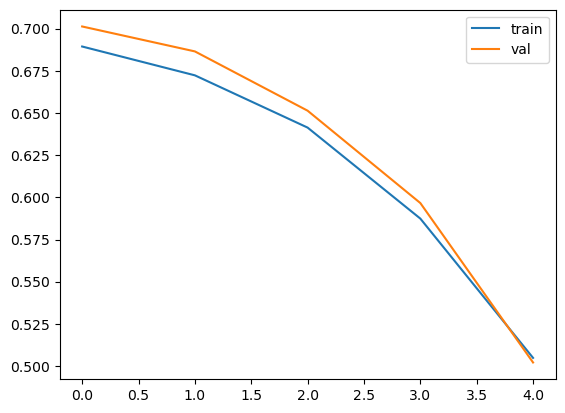

In [65]:
import pandas as pd

best, loss, val = anneal.stimulate(stimuli, validate=True, train_size=0.5)
pd.DataFrame(val).plot()